First import the libraries and load IBM stock data using data reader. Save that into a variable.

In [ ]:
!pip install pandas_datareader --upgrade
import pandas as pd
import pandas_datareader as dr
import matplotlib.pyplot as plt
import yfinance as yf
ibm_data = yf.download('IBM', start='2021-12-17', end='2022-12-17', progress=False)
#ibm_data= dr.data.get_data_yahoo('IBM','2010-10-10','2012-12-12')
ibm_data.info()
Y=ibm_data['Adj Close']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-12-17 to 2022-12-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Plot this time series data.

<Axes: xlabel='Date'>

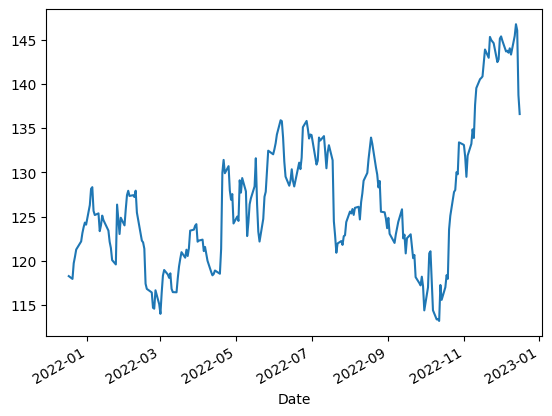

In [ ]:
Y.plot()

## Seasonal Decomposition
Components of time series:
* Trend
* Seasonal
* Residual

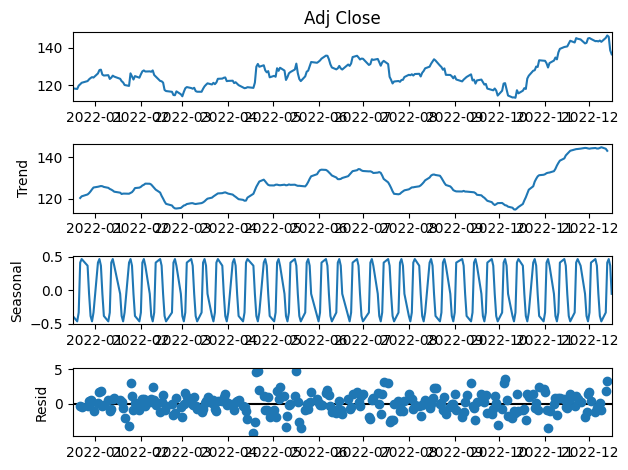

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Y,period=7).plot()
plt.show()

## Differences

Often the original time series and its differenced version have different properties. Here we first create a simple time series data with a trend component and a Gaussian white noise with mean 0 and variance 1

In [ ]:
import matplotlib.pyplot as plt
from math import radians
from math import sin
from numpy import random

In [ ]:
random.normal(0,1)

0.1344092834455332

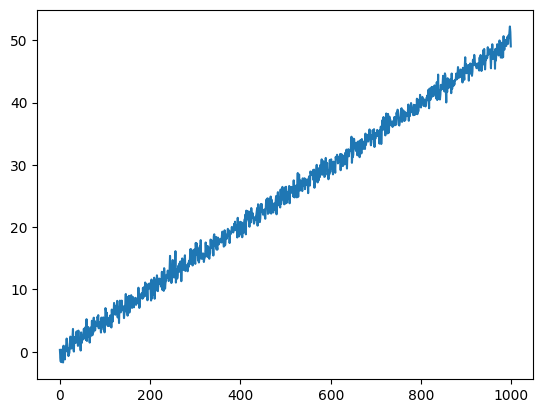

In [ ]:
data = [0.05*i+ random.normal(0,1) for i in range(1000) ]
plt.plot(data)
plt.show()

In [ ]:
[random.normal(0,1) for i in range(100)]

[-1.6985822791728704,
 0.010450112371489155,
 0.06259753459639637,
 1.5501865929251437,
 -1.2706463203535725,
 -0.15567217267610736,
 -0.4470050302866276,
 0.9815131681252992,
 -0.14766077006430245,
 -1.924965190862954,
 -1.2774095159879455,
 -0.9458961696325905,
 -0.14616903904481177,
 2.808648743909611,
 -0.18574508869369546,
 0.5035237201013396,
 -0.37977699725003744,
 0.4763803564528408,
 1.0016515849833136,
 0.49178400677082534,
 -0.2699247151889876,
 0.18143858139046723,
 0.2582964355558777,
 0.4232605909791042,
 -0.17196878864004914,
 1.260018524636985,
 -0.4334201113828209,
 0.00030116092284879686,
 -1.239209640905305,
 0.06686892828048976,
 -0.5691944101666576,
 -0.7095228385329696,
 -0.3131513667118491,
 -0.795621167063727,
 1.1190926310253533,
 1.2172507994728368,
 -0.11772580030672204,
 -1.9035111066796782,
 0.18772396470503533,
 -0.11394622168564367,
 -1.526495547215434,
 0.6057144790131669,
 0.057041273747479165,
 -0.07411227046066365,
 2.6786636617138364,
 -0.34620524847

In [ ]:
def difference(dataset, h=1):
  diff = list()
  for i in range(h, len(dataset)):
    value = dataset[i] - dataset[i - h]
    diff.append(value)
  return diff

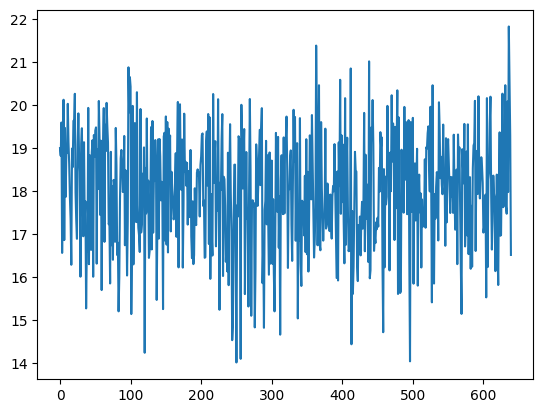

In [ ]:
diff = difference(data, 360)
plt.plot(diff)
plt.show()

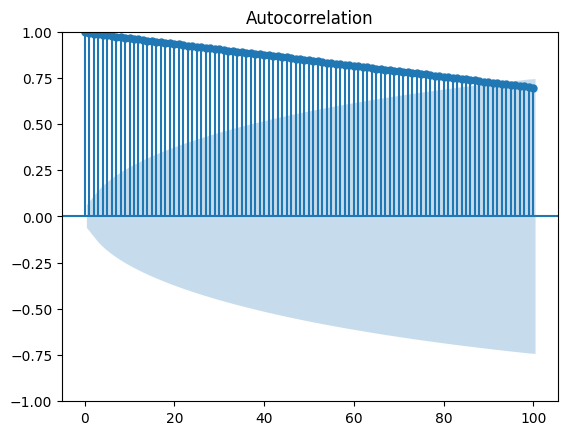

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data, lags=100)
plt.show()

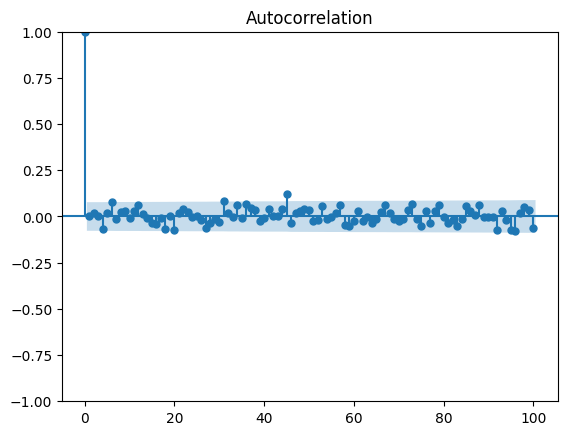

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff, lags=100)
plt.show()

In [ ]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(data, lags=[10])

,lb_stat,lb_pvalue
10,9652.069171,0.0


In [ ]:
sm.stats.acorr_ljungbox(diff, lags=[10])

,lb_stat,lb_pvalue
10,7.716192,0.656537


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


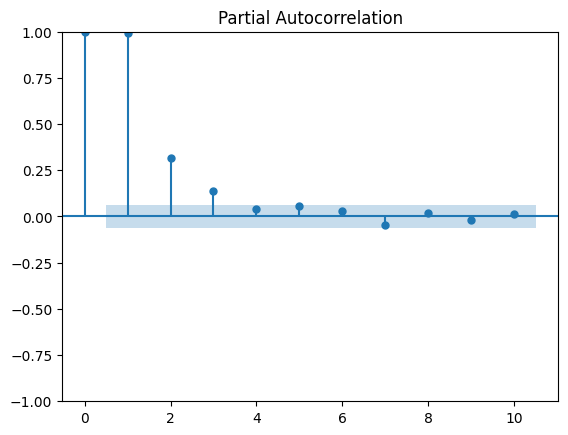

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data, lags=10)
plt.show()

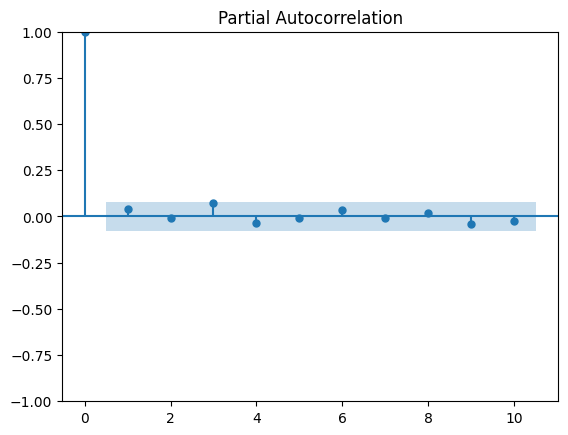

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diff, lags=10)
plt.show()

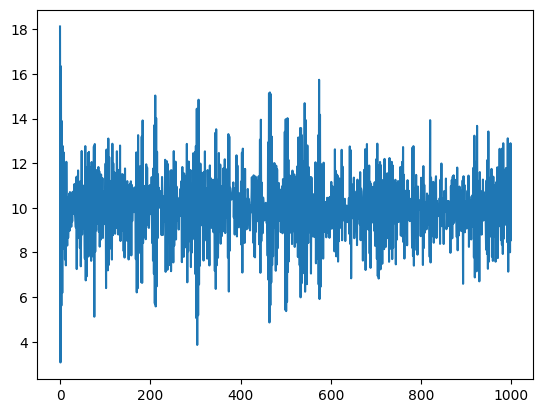

In [ ]:
import numpy as np
ar1 = np.zeros(1000)

ar1[0]= 18 + random.normal(0,1)

for i in range(1,1000):
  ar1[i] = 18 - 0.8*ar1[i-1] + random.normal(0,1) # generation of values
plt.plot(ar1)

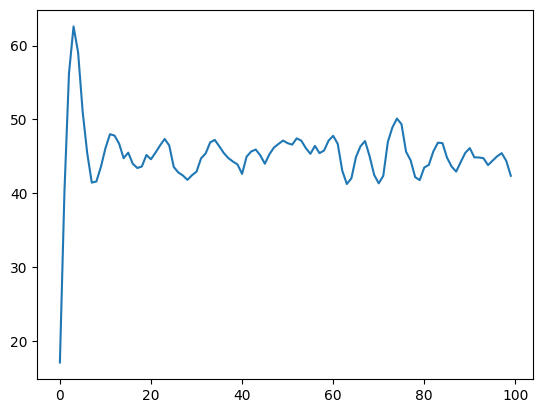

In [ ]:
ar2 = np.zeros(100)
ar2[0]= 18 + random.normal(0,1)
ar2[1]= 18 + 1.3*ar2[0] +random.normal(0,1)
for i in range(2,100):
  ar2[i]= 18+1.3*ar2[i-1]-0.7*ar2[i-2]+random.normal(0,1)
plt.plot(ar2)

# Autoregressive Models

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('https://raw.githubusercontent.com/swakkhar/MachineLearning/master/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset






<ipython-input-25-8922b3a0148b>:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('https://raw.githubusercontent.com/swakkhar/MachineLearning/master/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


<Axes: xlabel='Date'>

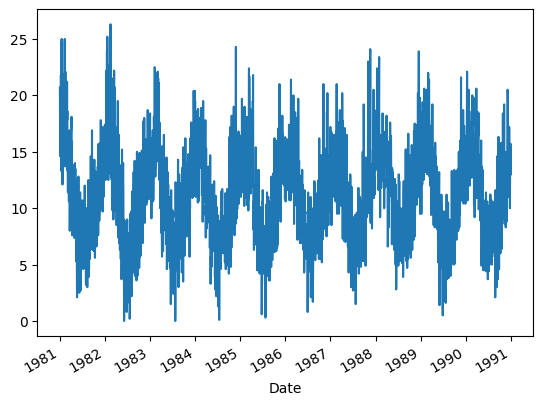

In [ ]:
series.plot()

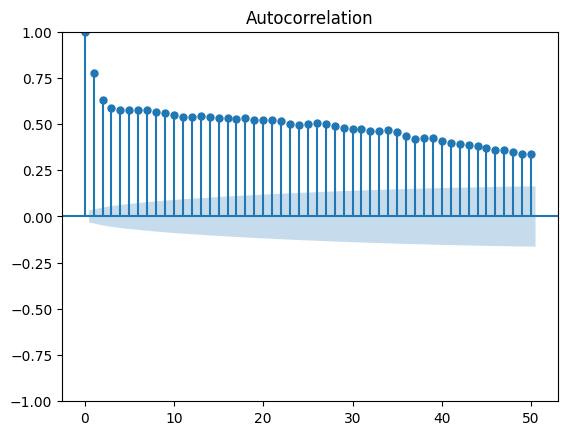

In [ ]:
plot_acf(series, lags=50)
plt.show()

In [ ]:
plot_pacf(series, lags=50)
plt.show()

NameError: ignored

[ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.659297, expected=14.600000
predicted=14.349246, expected=14.000000
predicted=13.427454, expected=13.600000
predicted=13.374877, expected=13.500000
predicted=13.479991, expected=15.700000
predicted=14.765146, expected=13.000000
Test RMSE: 1.204


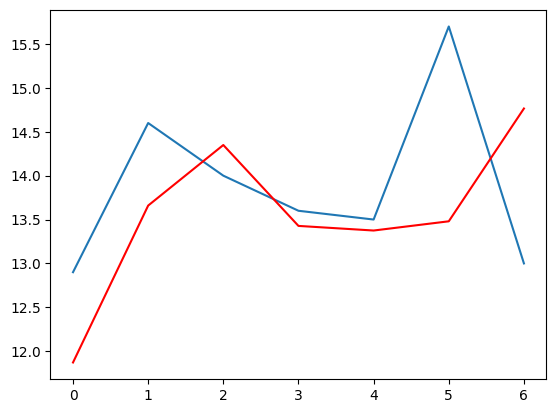

In [ ]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
window = 29 # hyperparameter
model = AutoReg(train,lags=window)
model_fit = model.fit()
coef = model_fit.params
print(coef)
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[11.484161    0.92273428 -0.24566579  0.35890003 -0.11073557 -0.22802257
  0.08618284 -0.37772228  0.65080818 -0.02229871 -0.04553274 -0.32756699
 -0.04095253 -0.29836951 -0.03203146  0.26189339  0.06612122  0.40592001
 -0.41235465 -0.21433104 -0.02964412  5.79483448]
[]
predicted=19.974943, expected=12.900000
predicted=27.510082, expected=14.600000
predicted=24.689380, expected=14.000000
predicted=26.269605, expected=13.600000
predicted=25.850115, expected=13.500000
predicted=24.275228, expected=15.700000
predicted=28.146162, expected=13.000000
Test RMSE: 11.631


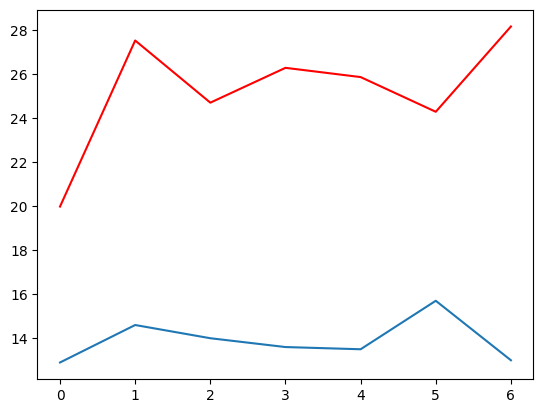

In [ ]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
window = 10
model = ARIMA(train,order=[window,0,window])
model_fit = model.fit()
coef = model_fit.params
print(coef)
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
print(predictions)
for t in range(len(test)):
  length = len(history)
  lag = [history[i] for i in range(length-window,length)]
  yhat = coef[0]
  for d in range(window):
      yhat += coef[d+1] * lag[window-d-1]
  obs = test[t]
  predictions.append(yhat)
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

<ipython-input-1-f88fe3391e58>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-1-f88fe3391e58>:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


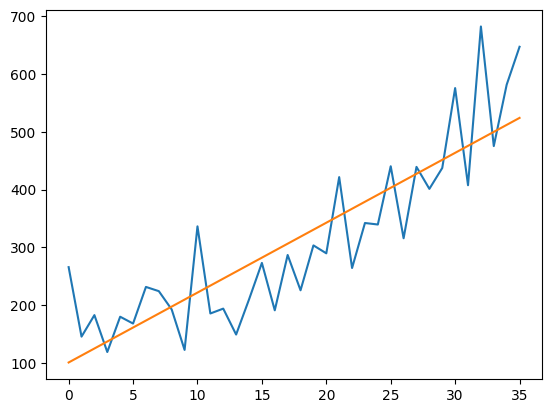

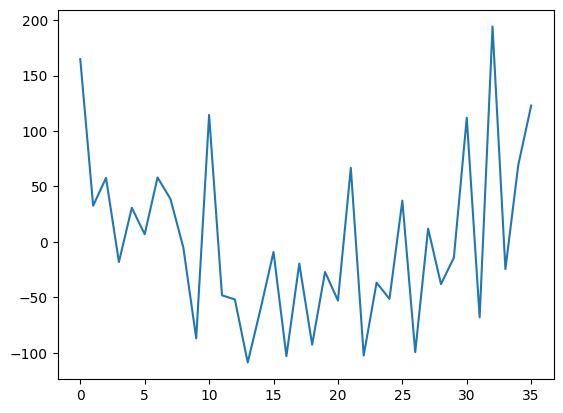

In [ ]:
from pandas import read_csv
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()